## 1) List TEN things you learned during Weeks 1 and 2 and FIVE things you still don't understand or are curious and would like to learn about.

YOUR ANSWER HERE

# 2) What is the difference between the uniform distribution and the gaussian distribution?

YOUR ANSWER HERE

# 3) Let's plot the two dimensional bivariate Gaussian distribution
The general formula for the two dimensional [bivariate Gaussian distribution](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) is:
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}}}e^-\left\{{\frac{1}{2}\begin{pmatrix} x-\mu_1& y-\mu_2\end{pmatrix}\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}^{-1}\begin{pmatrix}x-\mu_1\\y-\mu_2\end{pmatrix}}\right\}$$

This can be compacted into 
$$g(x,y)=\frac{1}{\sqrt{(2\pi)^2\det(\Sigma)}}e^-\left\{{\frac{1}{2}(u-\mu)^T\Sigma^{-1}(u-\mu)}\right\}$$

Compare the above formula to the one dimensional Gaussian distribution function:
$$g(x)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

- When there is only one random variable you only have one mean $\mu$ and one standard deviation $\sigma$.

- When there are two random variables, you have two means $\begin{pmatrix}\mu_1\\\mu_2\end{pmatrix}$, two standard deviations $\begin{pmatrix}\sigma_1\\\sigma_2\end{pmatrix}$, and the product $\sigma^2$ will be replaced by the covariance matrix $\Sigma=\begin{pmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{pmatrix}$ and its determinant. Here, $\rho$ is the correlation between the two random variables.

The following code plots the bivariate normal distribution. Read the code carefully then explain it step by step in the follwing cell.

/var/folders/gn/5tbh92r90t51x8x747vgdrnw0000gn/T/ipykernel_24738/3896253529.py:39: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  picture = fig.gca(projection='3d')


Text(0.5, 0.92, 'Bivariate Gaussian distribution')

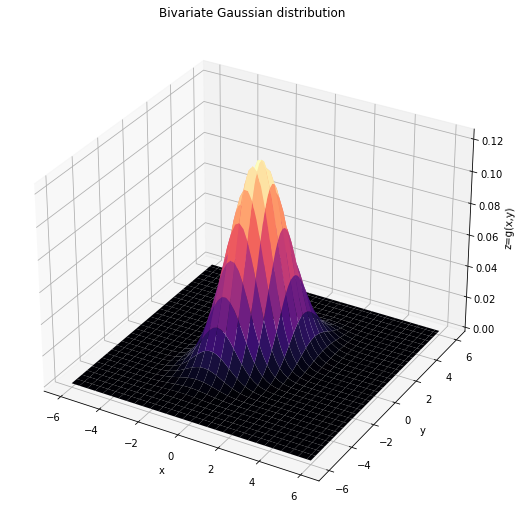

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits import mplot3d

# Our 2-dimensional distribution will be over variables X and Y
n = 60 # number of grid points on each axis
X = np.linspace(-6, 6, n)
Y = np.linspace(-6, 6, n)
X, Y = np.meshgrid(X, Y)
# Stack X and Y into a single 3-dimensional array
position = np.empty(X.shape + (2,)) #this gives a tensor of shape (60,60,2)
position[:, :, 0] = X
position[:, :, 1] = Y

# Mean vector and covariance matrix
mu_1=0
mu_2=0
mu = np.array([mu_1, mu_2])
Sigma = np.array([[ 1 , 3/5], [3/5,  2]])

def multivariate_gaussian(position, mu, Sigma):
    """This function returns the bivariate Gaussian distribution on array pos.
       pos is an array constructed by packing the meshed arrays of variables x and y into its last dimension.
    """
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**2 * Sigma_det) # this is the normalizing constant.
    fac = np.einsum('...k,kl,...l->...', position-mu, Sigma_inv, position-mu) # This einsum or Einstein sum calculates (u-mu)^T.Sigma^-1.(u-mu) in a vectorized
    # way across all the input variables.

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y stacked into position tensor.
Z = multivariate_gaussian(position, mu, Sigma)

# Create a surface plot
fig = plt.figure(figsize=(9,9))
picture = fig.axes(projection='3d')
picture.plot_surface(X, Y, Z, cmap=cm.magma) 
# set labels for axes
picture.set_xlabel('x')
picture.set_ylabel('y')
picture.set_zlabel('z=g(x,y)')
# set image title
picture.set_title('Bivariate Gaussian distribution')     

# Explain the above code line by line.

YOUR ANSWER HERE

# 4) Now let's sample n points $(x_i,y_i)$ from the bivariate Gaussian distribution and use seaborn library to plot the sampled points in the x-y plane. These should look like the shadow in the $x$-$y$ plane of the surface plot of $g(x,y)$ above.
Read the following code then explain it line by line in the next cell.

Text(0.5, 1.0, 'Scatterplot for 6000 points sampled from the gaussian bivariate distribution')

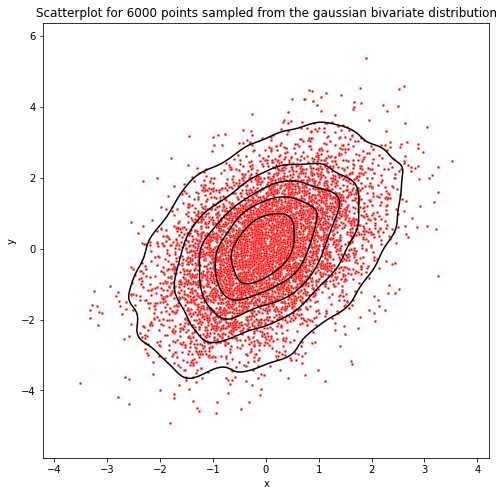

In [2]:
import seaborn as sns

# Simulate data from a bivariate Gaussian
n = 6000
mean = [0, 0]
cov = [(1, 3/5), (3/5, 2)]
x, y = np.random.multivariate_normal(mean, cov, n).T

# Draw a scatterplot with density contours
fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=x, y=y, s=7, color="r")
sns.kdeplot(x=x, y=y, levels=6, color="k", linewidths=1.5)
# set labels for axes
plt.xlabel('x')
plt.ylabel('y')
# set image title
plt.title('Scatterplot for {} points sampled from the gaussian bivariate distribution'.format(n))

# Explain the above code line by line.

YOUR ANSWER HERE

# 5) Create a class for a car dealership called cars

1. The instances belonging to the class should have 5 attributes: make, model, year, color, and VIN number. 
2. Then specify 10 instances belonging to this class, and call certain attributes for three of these instances. 
3. Convert these instances into a dictionary then a data frame using one line of code. 
4. Create a histogram for each attribute. 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# 6) Consider the following image of car data
![image](carData.png)

1. Write a class that defines a blueprint for the data in this table and the associated attributes.
2. Enter all the instances pictured in the table.
3. Convert the instances into dictionaries then create the data frame similar to the above table.
4. Plot a histogram showing the distribution of the gas tank capacity of the cars.
5. Convert the categorical data in the Type column to numerical data reflecting its order.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# 7) Make a three dimensional contour or surface plot for the function

$$f(x,y)=3(1-x)^2e^{-x^2-(y+1)^2}-10\left(\frac{x}{5}-x^3-y^5\right)e^{-x^2-y^2}-\frac{1}{3}e^{-(x+1)^2 - y^2}$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()